In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
<class 'numpy.ndarray'>


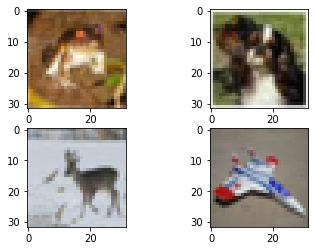

In [3]:
plt.subplot(221)
plt.imshow(x_train[0])

plt.subplot(222)
plt.imshow(x_train[500])

plt.subplot(223)
plt.imshow(x_train[20])

plt.subplot(224)
plt.imshow(x_train[30])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(50000, 32, 32, 3)
<class 'numpy.ndarray'>


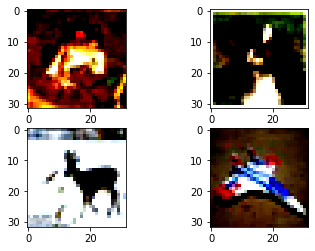

In [4]:
def normalize(X_train, X_test):
    mean = np.mean(X_train, axis = (0, 1, 2, 3))
    std  = np.std(X_train, axis = (0, 1, 2, 3))
    X_train = (X_train - mean) / (std + 1e-7)
    X_test  = (X_test - mean) / (std + 1e-7)
    return X_train, X_test, mean, std

x_train, x_test, mean_train, std_train = normalize(x_train, x_test)
print(x_train.shape)
print(type(x_train))

plt.subplot(221)
plt.imshow(x_train[0])

plt.subplot(222)
plt.imshow(x_train[500])

plt.subplot(223)
plt.imshow(x_train[20])

plt.subplot(224)
plt.imshow(x_train[30])

In [5]:
one_hot = OneHotEncoder()
y_train = one_hot.fit_transform(y_train).toarray()
y_test  = one_hot.transform(y_test).toarray()
print(y_train)
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [7]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(Convolution2D(128, (3, 3), activation = 'relu'))
model.add(Convolution2D(64, (3, 3), activation = 'relu'))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 32)          1

In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=100, epochs=100)

Epoch 1/100
500/500 [==============================] - 8s 12ms/step - loss: 1.9580 - accuracy: 0.3091
Epoch 2/100
500/500 [==============================] - 6s 12ms/step - loss: 1.3575 - accuracy: 0.5147
Epoch 3/100
500/500 [==============================] - 6s 12ms/step - loss: 1.1408 - accuracy: 0.5975
Epoch 4/100
500/500 [==============================] - 6s 12ms/step - loss: 1.0213 - accuracy: 0.6412
Epoch 5/100
500/500 [==============================] - 6s 12ms/step - loss: 0.9178 - accuracy: 0.6791
Epoch 6/100
500/500 [==============================] - 6s 12ms/step - loss: 0.8376 - accuracy: 0.7085
Epoch 7/100
500/500 [==============================] - 6s 12ms/step - loss: 0.7728 - accuracy: 0.7307
Epoch 8/100
500/500 [==============================] - 6s 12ms/step - loss: 0.7205 - accuracy: 0.7485
Epoch 9/100
500/500 [==============================] - 6s 12ms/step - loss: 0.6753 - accuracy: 0.7685
Epoch 10/100
500/500 [==============================] - 6s 12ms/step - loss: 0.629

500/500 [==============================] - 6s 12ms/step - loss: 0.0578 - accuracy: 0.9819
Epoch 81/100
500/500 [==============================] - 6s 12ms/step - loss: 0.0555 - accuracy: 0.9818
Epoch 82/100
500/500 [==============================] - 6s 12ms/step - loss: 0.0569 - accuracy: 0.9802
Epoch 83/100
500/500 [==============================] - 6s 12ms/step - loss: 0.0684 - accuracy: 0.9774
Epoch 84/100
500/500 [==============================] - 6s 13ms/step - loss: 0.0673 - accuracy: 0.9792
Epoch 85/100
500/500 [==============================] - 6s 13ms/step - loss: 0.0548 - accuracy: 0.9817
Epoch 86/100
500/500 [==============================] - 7s 14ms/step - loss: 0.0585 - accuracy: 0.9797
Epoch 87/100
500/500 [==============================] - 7s 13ms/step - loss: 0.0538 - accuracy: 0.9816
Epoch 88/100
500/500 [==============================] - 8s 15ms/step - loss: 0.0532 - accuracy: 0.9823
Epoch 89/100
500/500 [==============================] - 6s 13ms/step - loss: 0.0529 - 

In [19]:
pre = model.predict(x_test)

In [22]:
count = 0
for i in range(len(pre)):
    predy = np.where(pre[i] == max(pre[i]))
    truthy = np.where(y_test[i] == max(y_test[i]))
    if predy == truthy:
        count+=1
count/len(pre)

0.7621

In [24]:
input_example=(np.zeros(shape=(1,32,32,3))-mean_train)/(std_train+1e-7) 
model.predict(input_example)

array([[2.3677685e-05, 6.0776216e-08, 1.2100005e-06, 3.4190211e-03,
        9.9358010e-01, 2.4665180e-08, 5.4352695e-05, 6.7167196e-09,
        2.9209820e-03, 5.9447797e-07]], dtype=float32)